In [1]:
from numpy.random import seed
seed(888)
import tensorflow 
tensorflow.random.set_seed(404)

In [2]:
import os
import keras
import itertools
from keras.datasets import cifar10 

from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

import numpy as np
import pandas as pd

from IPython.display import display
from keras.preprocessing.image import array_to_img

from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

from time import strftime

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [3]:
cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [4]:
# X contains all the images in a column

# Y contains all values corresponding to the images

# Constants

In [5]:
LOG_DIR = 'tensorboard_cifar_logs'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
LAYERS = 3

TOTAL_INPUTS = IMAGE_HEIGHT * IMAGE_WIDTH * LAYERS # TOTAL_INPUTS is the amount of inputs that will be provided by one single image

VALIDATION_SIZE = 10000

SMALL_TRAIN_SIZE = 1000

In [6]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [7]:
x_train_all.shape

(50000, 32, 32, 3)

In [8]:
print(type(cifar10))
print(type(x_train_all))

<class 'module'>
<class 'numpy.ndarray'>


In [9]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
y_train_all

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train_all.shape

(50000, 1)

In [12]:
y_train_all[7][0]

7

In [13]:
y_train_all[4][0]

1

In [14]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

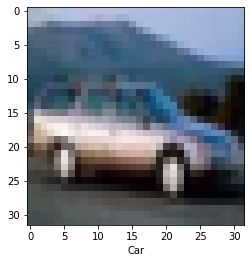

In [15]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]])
plt.show()

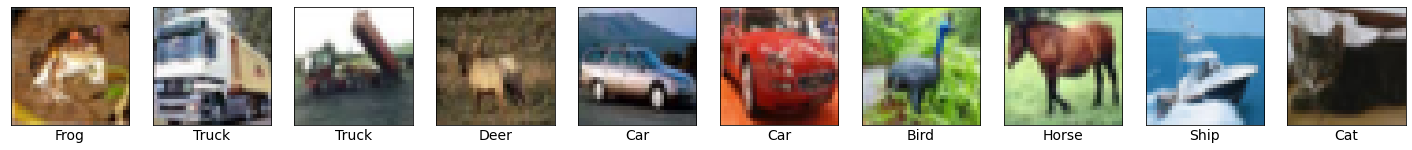

In [16]:
# challenge

plt.figure(figsize=(25, 10))


for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    plt.imshow(x_train_all[i])
  

In [17]:
x_train_all.shape

(50000, 32, 32, 3)

In [18]:
nr_images, x, y, c = x_train_all.shape

print(f'Images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
x_train_all

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [21]:
x_train_all[0] # first image from the training data

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
x_train_all[0] # First Row

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Preprocess data

In [23]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [24]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_train_all.shape

(50000, 3072)

In [25]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
x_test.shape

(10000, 3072)

# Create a Validation Dataset

In [26]:
# Validation dataset contains first 1000 images from the original training dataset

x_valid = x_train_all[:VALIDATION_SIZE]
y_valid = y_train_all[:VALIDATION_SIZE]

In [27]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

# Create a small dataset for illustration

In [28]:
# xs dataset contains first 1000 images from training dataset 

x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [29]:
# model_1 = Sequential([
#                       Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden'), 
#                       Dense(units=64, activation='relu', name='m1_hidden2'),                                  
#                       Dense(16, activation='relu', name='m1_hidden3'),                                                  
#                       Dense(10, activation='softmax', name='m1_output')                                                
#                     ]) 

# model_1.compile(
#                 optimizer='adam', 
#                 loss='sparse_categorical_crossentropy', 
#                 metrics=['accuracy']
#                 )

In [30]:
# model_2 = Sequential()

# model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS, )))
# model_2.add(Dense(units=128, activation='relu', name='m2_hidden1'))
# model_2.add(Dense(units=64, activation='relu', name='m2_hidden2'))
# model_2.add(Dense(units=16, activation='relu', name='m2_hidden3'))
# model_2.add(Dense(units=10, activation='softmax', name='m2_output'))

# model_2.compile(
#                 optimizer='adam', 
#                 loss='sparse_categorical_crossentropy', 
#                 metrics=['accuracy']
#                 )

In [32]:
# type(model_1)

In [34]:
# model_1.summary() # Params are just connections (number of each nueron connected with the other corresponding neurons)

In [35]:
(3072 * 128 + 128) + (128 * 64 + 64) + (64 * 16 + 16) + (16 * 10 + 10) 

402810

# Tensorboard (Visualise Learning)

In [36]:
def get_tensorboard(model_name):
    
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created the directory!')
        
    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [37]:
samples_per_batch = 1000

In [38]:
# %%time

# nr_epochs = 150

# model_1.fit(
#             x_train_xs, y_train_xs, 
#             epochs=nr_epochs, 
#             batch_size=samples_per_batch ,
#             callbacks=[get_tensorboard('Model 1')],     
#             validation_data=(x_valid, y_valid)
#             )

# Overfitting
## Definition : Overfitting happens when the model learns the training data too well 
### Diagnosing the Overfitting vs Underfitting Problem : 
### Looking at the performance and comparing the Training daatset and the validation daatset
#### 1) Checking whether the loss in the validation dataset is decreasing or increasing
#### 2) Checking the performnace n the training dataset and the validation dataset - is the accuracy difference very much big between these two datasets

# Regularization:
## Techniques for preventing overfitting are called Regularization

In [39]:
# %%time

# nr_epochs = 150

# model_2.fit(
#             x_train_xs, y_train_xs, 
#             epochs=nr_epochs, 
#             batch_size=samples_per_batch ,
#             callbacks=[get_tensorboard('Model 2')],     
#             validation_data=(x_valid, y_valid)
#             )

# Training model-1 and model-2 on original training datasets with dropout function as the first layer

In [40]:
%%time

model_1 = Sequential([
                      Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden'), 
                      Dense(units=64, activation='relu', name='m1_hidden2'),                                  
                      Dense(16, activation='relu', name='m1_hidden3'),                                                  
                      Dense(10, activation='softmax', name='m1_output')                                                
                    ]) 

model_1.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

# %%time

nr_epochs = 100

model_1.fit(
            x_train, y_train, 
            epochs=nr_epochs, 
            batch_size=samples_per_batch ,
            callbacks=[get_tensorboard('Model 1 XL')],     
            validation_data=(x_valid, y_valid)
            )

Successfully created the directory!
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 83us/sample - loss: 2.3062 - accuracy: 0.1016 - val_loss: 2.2633 - val_accuracy: 0.1135
Epoch 2/100
40000/40000 [==============================] - 2s 48us/sample - loss: 2.2530 - accuracy: 0.1153 - val_loss: 2.2399 - val_accuracy: 0.1420
Epoch 3/100
40000/40000 [==============================] - 2s 48us/sample - loss: 2.2168 - accuracy: 0.1567 - val_loss: 2.1937 - val_accuracy: 0.2008
Epoch 4/100
40000/40000 [==============================] - 2s 46us/sample - loss: 2.1642 - accuracy: 0.2116 - val_loss: 2.1243 - val_accuracy: 0.2212
Epoch 5/100
40000/40000 [==============================] - 2s 42us/sample - loss: 2.1002 - accuracy: 0.2411 - val_loss: 2.0536 - val_accuracy: 0.2490
Epoch 6/100
40000/40000 [==============================] - 2s 41us/sample - loss: 2.0051 - accuracy: 0.2715 - val_loss: 1.9509 - val_accuracy: 0.2964
Epoch 7/100
40

Epoch 55/100
40000/40000 [==============================] - 2s 41us/sample - loss: 1.3533 - accuracy: 0.5186 - val_loss: 1.4930 - val_accuracy: 0.4709
Epoch 56/100
40000/40000 [==============================] - 2s 43us/sample - loss: 1.3444 - accuracy: 0.5224 - val_loss: 1.4686 - val_accuracy: 0.4755
Epoch 57/100
40000/40000 [==============================] - 2s 42us/sample - loss: 1.3424 - accuracy: 0.5208 - val_loss: 1.4699 - val_accuracy: 0.4802
Epoch 58/100
40000/40000 [==============================] - 2s 41us/sample - loss: 1.3432 - accuracy: 0.5214 - val_loss: 1.4871 - val_accuracy: 0.4792
Epoch 59/100
40000/40000 [==============================] - 2s 41us/sample - loss: 1.3404 - accuracy: 0.5229 - val_loss: 1.4738 - val_accuracy: 0.4760
Epoch 60/100
40000/40000 [==============================] - 2s 42us/sample - loss: 1.3403 - accuracy: 0.5244 - val_loss: 1.4744 - val_accuracy: 0.4772
Epoch 61/100
40000/40000 [==============================] - 2s 42us/sample - loss: 1.3337 - ac

In [41]:
%%time

model_2 = Sequential()

model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_2.add(Dense(units=128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(units=64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(units=16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(units=10, activation='softmax', name='m2_output'))

model_2.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

# %%time

nr_epochs = 100

model_2.fit(
            x_train, y_train, 
            epochs=nr_epochs, 
            batch_size=samples_per_batch ,
            callbacks=[get_tensorboard('Model 2 XL')],     
            validation_data=(x_valid, y_valid)
            )

Successfully created the directory!
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 101us/sample - loss: 2.1568 - accuracy: 0.2033 - val_loss: 2.0119 - val_accuracy: 0.2823
Epoch 2/100
40000/40000 [==============================] - 3s 79us/sample - loss: 1.9651 - accuracy: 0.2937 - val_loss: 1.9083 - val_accuracy: 0.3151
Epoch 3/100
40000/40000 [==============================] - 3s 78us/sample - loss: 1.8988 - accuracy: 0.3165 - val_loss: 1.8375 - val_accuracy: 0.3468
Epoch 4/100
40000/40000 [==============================] - 3s 78us/sample - loss: 1.8463 - accuracy: 0.3392 - val_loss: 1.8166 - val_accuracy: 0.3470
Epoch 5/100
40000/40000 [==============================] - 3s 81us/sample - loss: 1.8159 - accuracy: 0.3532 - val_loss: 1.7699 - val_accuracy: 0.3691
Epoch 6/100
40000/40000 [==============================] - 3s 80us/sample - loss: 1.7866 - accuracy: 0.3650 - val_loss: 1.7504 - val_accuracy: 0.3794
Epoch 7/100
4

Epoch 55/100
40000/40000 [==============================] - 3s 76us/sample - loss: 1.4245 - accuracy: 0.4905 - val_loss: 1.4604 - val_accuracy: 0.4788
Epoch 56/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.4197 - accuracy: 0.4940 - val_loss: 1.4596 - val_accuracy: 0.4779
Epoch 57/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.4210 - accuracy: 0.4953 - val_loss: 1.4502 - val_accuracy: 0.4837
Epoch 58/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.4194 - accuracy: 0.4971 - val_loss: 1.4621 - val_accuracy: 0.4791
Epoch 59/100
40000/40000 [==============================] - 3s 76us/sample - loss: 1.4122 - accuracy: 0.5015 - val_loss: 1.4597 - val_accuracy: 0.4776
Epoch 60/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.4147 - accuracy: 0.4949 - val_loss: 1.4688 - val_accuracy: 0.4780
Epoch 61/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.4158 - ac

# Training model-3 with dropout function as two layees

In [42]:
%%time

model_3 = Sequential()

model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS, )))
model_3.add(Dense(units=128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.2, seed=42))
model_3.add(Dense(units=64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(units=16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(units=10, activation='softmax', name='m3_output'))

model_3.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

# %%time

nr_epochs = 100

model_3.fit(
            x_train, y_train, 
            epochs=nr_epochs, 
            batch_size=samples_per_batch ,
            callbacks=[get_tensorboard('Model 3 XL')],     
            validation_data=(x_valid, y_valid)
            )

Successfully created the directory!
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 104us/sample - loss: 2.2520 - accuracy: 0.1541 - val_loss: 2.1364 - val_accuracy: 0.2082
Epoch 2/100
40000/40000 [==============================] - 3s 82us/sample - loss: 2.0667 - accuracy: 0.2331 - val_loss: 1.9216 - val_accuracy: 0.3026
Epoch 3/100
40000/40000 [==============================] - 3s 78us/sample - loss: 1.9432 - accuracy: 0.2916 - val_loss: 1.8475 - val_accuracy: 0.3355
Epoch 4/100
40000/40000 [==============================] - 3s 81us/sample - loss: 1.8776 - accuracy: 0.3247 - val_loss: 1.7866 - val_accuracy: 0.3595
Epoch 5/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.8288 - accuracy: 0.3461 - val_loss: 1.7426 - val_accuracy: 0.3717
Epoch 6/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.7956 - accuracy: 0.3569 - val_loss: 1.7166 - val_accuracy: 0.3868
Epoch 7/100
4

Epoch 55/100
40000/40000 [==============================] - 3s 78us/sample - loss: 1.5186 - accuracy: 0.4527 - val_loss: 1.4562 - val_accuracy: 0.4825
Epoch 56/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.5106 - accuracy: 0.4563 - val_loss: 1.4465 - val_accuracy: 0.4791
Epoch 57/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.5090 - accuracy: 0.4552 - val_loss: 1.4434 - val_accuracy: 0.4831
Epoch 58/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.5065 - accuracy: 0.4591 - val_loss: 1.4475 - val_accuracy: 0.4854
Epoch 59/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.5086 - accuracy: 0.4562 - val_loss: 1.4497 - val_accuracy: 0.4833
Epoch 60/100
40000/40000 [==============================] - 3s 77us/sample - loss: 1.5025 - accuracy: 0.4575 - val_loss: 1.4459 - val_accuracy: 0.4876
Epoch 61/100
40000/40000 [==============================] - 3s 79us/sample - loss: 1.5058 - ac

# Predictions on individual images

In [ ]:
x_valid.shape

In [ ]:
x_valid[0].shape # First image from the training data

In [ ]:
np.set_printoptions(precision=3) # Prints upto 3 decimal points

In [ ]:
test = np.expand_dims(x_valid[0], axis=0)
test.shape

In [ ]:
model_2.predict(test)

In [ ]:
model_2.predict(x_valid)

In [ ]:
model_2.predict(x_valid).shape # 10 Probabilities for 1000 images

In [ ]:
model_2.predict_classes(test) # 1st image from the testing data under x

In [ ]:
y_valid[0] # 1st image from the testing data under y

In [ ]:
# Challenge : Write a for loop to print the actual value vs the predicted value for the first 10 images from the validation dataset

for i in range(10):
    testing = np.expand_dims(x_valid[i], axis=0)
    predicted_value = model_2.predict_classes(testing)[0]
    actual_value = y_valid[i]
    print(f'Actual Value : {actual_value} vs Predicted Value : {predicted_value}')

# Evaluation 

In [ ]:
model_2.metrics_names

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)

print(f'TEST LOSS : {test_loss:0.3} | TEST ACCURACY : {test_accuracy:0.1%}')

In [ ]:
conf_matrix = confusion_matrix(y_test, model_2.predict_classes(x_valid))